# Predict whether or not a customer will churn

In [2]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# memanggil dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head() # memanggil data teratas

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Exploratory Data Analysis

In [6]:
# mengecek apakah ada data yang kosong atau nol
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

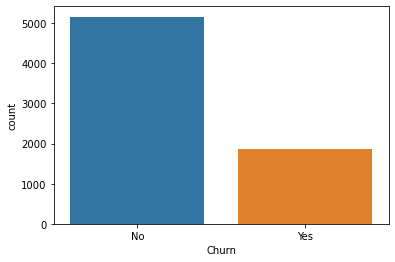

In [7]:
# melihat class label (Churn) dengan count plot
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

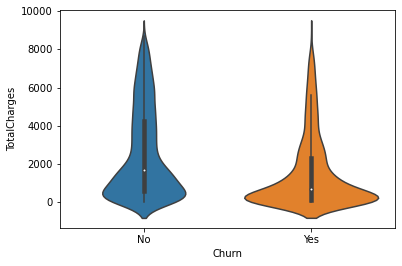

In [8]:
# melihat distribusi TotalCharges dengan Churn Category dengan box plot atau violin plot
sns.violinplot(data=df, x='Churn', y='TotalCharges')

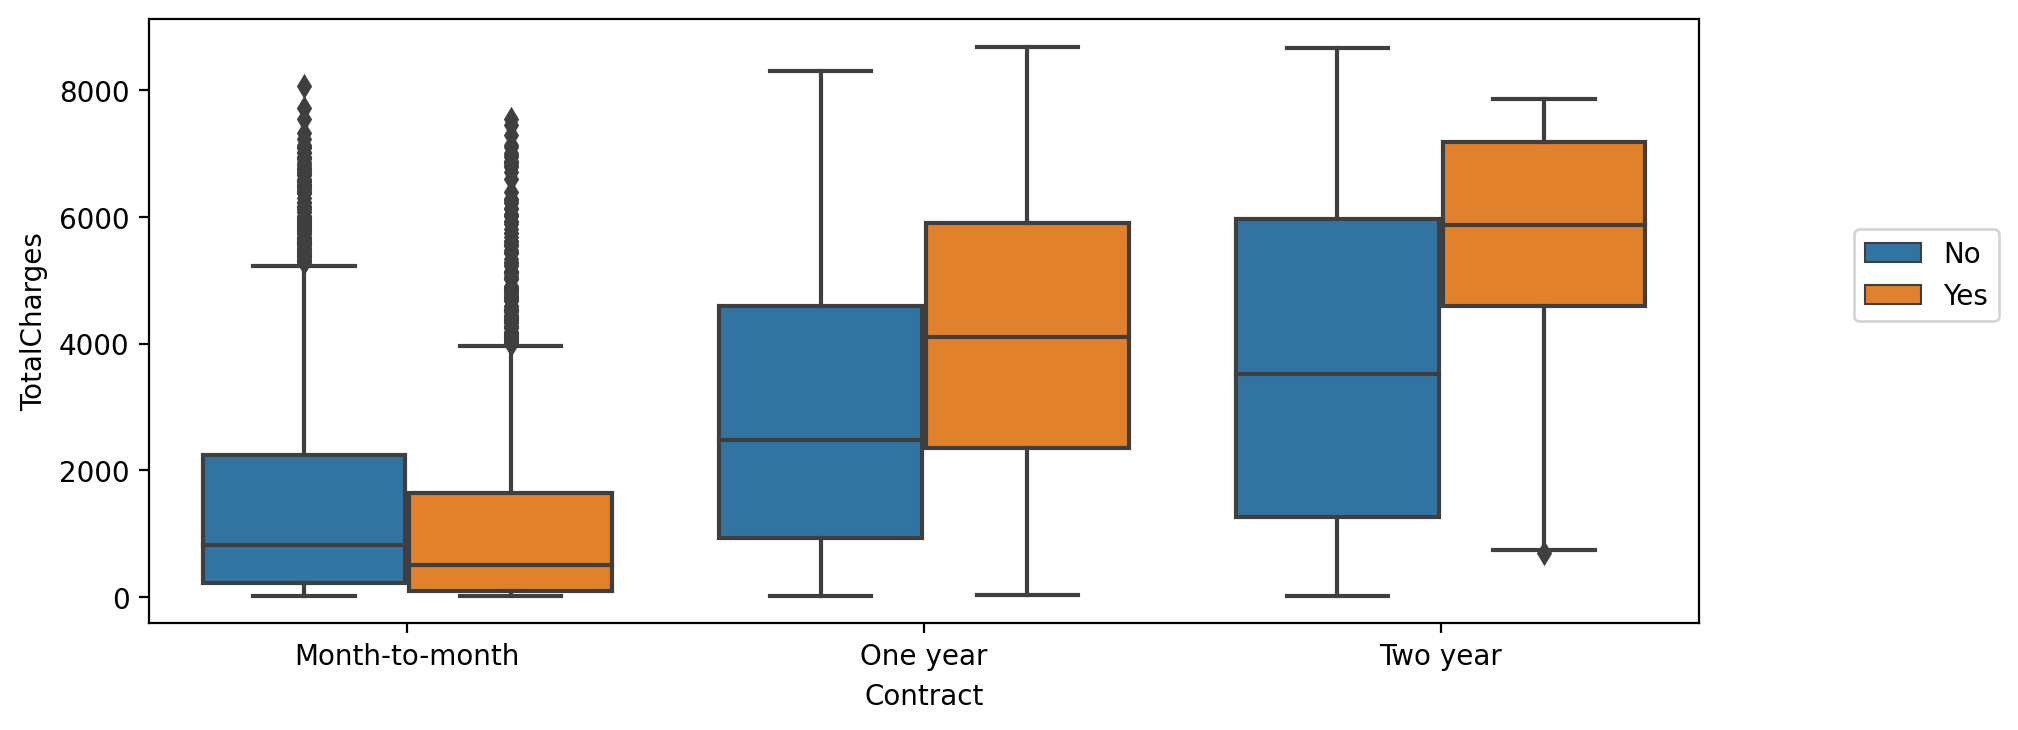

In [9]:
# menampilkan boxplot untuk melihat distribusi TotalCharges per Contract type, juga menambhakan hue berdasarkan churn
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')
plt.legend(loc=(1.1, 0.5))

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [12]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMetho

In [13]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

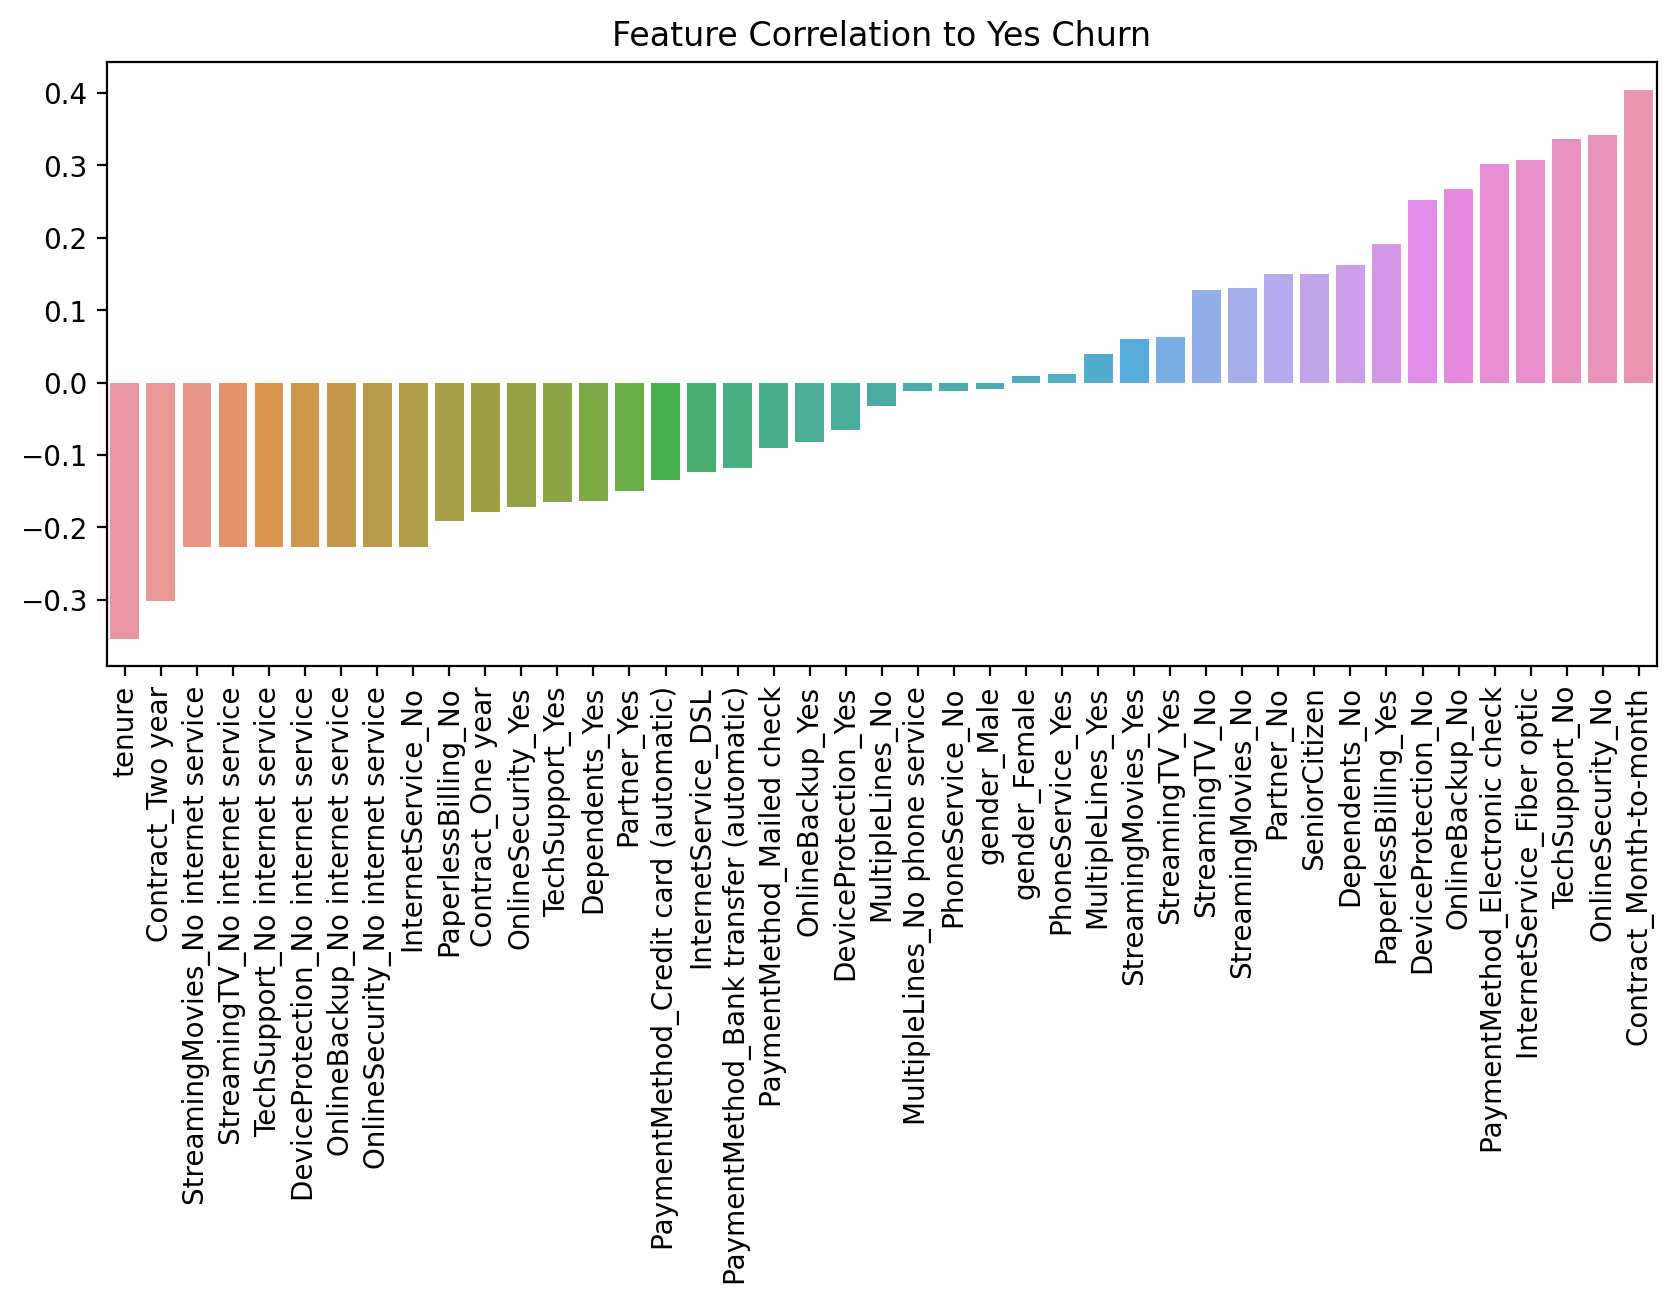

In [14]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90);

In [15]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [16]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [17]:
df.head()[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


## Predictive Modeling

# Decision Tree

In [18]:
# membuat variabel X
X = df.drop(['Churn', 'customerID'],axis=1)
X = pd.get_dummies(X, drop_first=True)

In [19]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [20]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
len(X_train), len(y_train), len(X_test), len(y_test)

(6328, 6328, 704, 704)

### Use GridSearchCV to look for better hyperparameter

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [25]:
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5,6,7]

In [26]:
param_grid_dt = {"criterion" :criterion,
             "max_depth" :max_depth}

In [27]:
Decision_tree = DecisionTreeClassifier()
grid_dt = GridSearchCV(Decision_tree, param_grid_dt)

In [28]:
grid_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7]})

### Get the best parameter

In [29]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [124]:
prediction_dt = grid_dt.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

### Evaluation

In [126]:
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



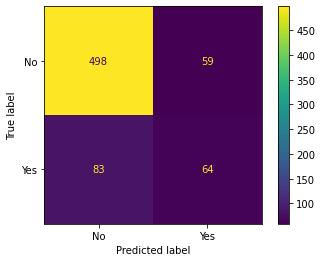

In [127]:
plot_confusion_matrix(grid_dt, X_test, y_test)

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
len(X.columns)

33

In [110]:
n_estimators=[64,100,128,200]
max_features= [2,3,4,5,6,7,8]
bootstrap = [True,False]

In [111]:
param_grid_rf = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [112]:
random_forest = RandomForestClassifier(random_state=101)
grid_rf = GridSearchCV(random_forest, param_grid_rf)

In [113]:
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [64, 100, 128, 200]})

In [114]:
grid_rf.best_params_

{'bootstrap': True, 'max_features': 5, 'n_estimators': 64}

In [115]:
prediction_rf = grid_rf.predict(X_test)

In [116]:
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



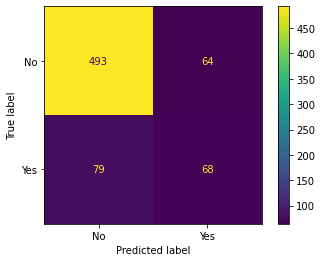

In [117]:
plot_confusion_matrix(grid_rf, X_test, y_test)